In [1]:
import pandas as pd
import numpy as np
import json
import random
from ast import literal_eval
from datetime import datetime

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
# from scipy import misc
import imageio

import spotipy
import spotipy.util as util 
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2

%matplotlib inline

# Authorization with Spotify's API

In [2]:
scope = 'user-library-read user-library-modify playlist-modify-public playlist-modify-private user-read-private user-read-playback-state user-modify-playback-state'
username = ''
client_id = ''
client_secret = ''
redirect_uri = 'http://google.com/'

token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)
sp = spotipy.Spotify(auth=token)

user = sp.current_user()

# Read in our data

In [3]:
data = pd.read_csv('tracks.csv')

In [4]:
data.describe()

,popularity,liked,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4604.000000,4.604000e+03,4604.000000
mean,34.140747,0.575804,0.572019,0.682415,5.377498,-7.195195,0.627063,0.098324,0.190657,0.134402,0.210420,0.457417,123.319279,2.302840e+05,3.938532
std,22.050230,0.494274,0.178464,0.216726,3.564066,3.756717,0.483638,0.099570,0.256449,0.283819,0.181956,0.255883,29.526164,7.696364e+04,0.339200
min,0.000000,0.000000,0.000000,0.006050,0.000000,-38.382000,0.000000,0.000000,0.000001,0.000000,0.016800,0.000000,0.000000,2.166700e+04,0.000000
25%,13.000000,0.000000,0.459750,0.544000,2.000000,-8.517000,0.000000,0.036575,0.006683,0.000000,0.097900,0.247000,99.963000,1.890665e+05,4.000000
50%,35.000000,1.000000,0.586000,0.709000,6.000000,-6.502000,1.000000,0.054100,0.063350,0.000042,0.135000,0.447000,122.960000,2.189865e+05,4.000000
75%,52.000000,1.000000,0.703250,0.852000,9.000000,-4.765000,1.000000,0.118000,0.285000,0.027300,0.273000,0.651250,141.335000,2.589902e+05,4.000000
max,93.000000,1.000000,0.979000,0.999000,11.000000,-0.734000,1.000000,0.862000,0.996000,0.993000,0.993000,0.993000,239.817000,1.412451e+06,5.000000


# Create A Decision Tree Classifier

In [5]:
train, test = train_test_split(data, test_size=0.15)

In [6]:
tree = DecisionTreeClassifier(min_samples_split=150)

In [7]:
data_features = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

In [8]:
x_train = train[data_features]
y_train = train['liked']

x_test = test[data_features]
y_test = test['liked']

In [9]:
dt = tree.fit(x_train, y_train)

In [10]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize'] = (16, 16)
    plt.imshow(img)

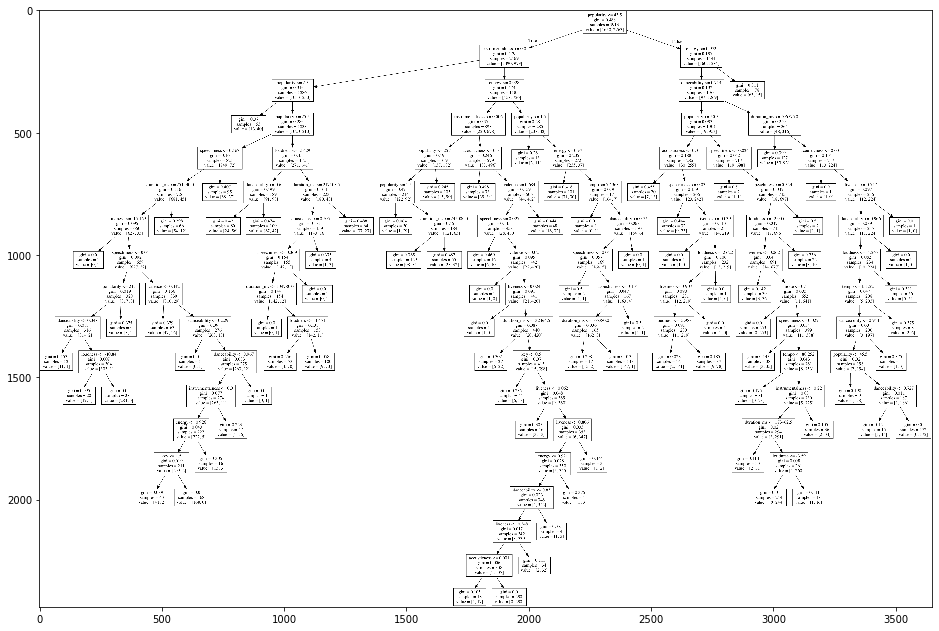

In [11]:
show_tree(dt, data_features, 'tree.png')

In [12]:
y_pred = tree.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,

In [13]:
score = accuracy_score(y_test, y_pred) * 100
print(f'Decision Tree Accuracy: {round(score, 2)}') # 85.38, 86.16

Decision Tree Accuracy: 84.23


# Get a list of related songs

In [14]:
def print_json(to_print):
    print(json.dumps(to_print, sort_keys=True, indent=4))

In [15]:
data_features = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

liked = data[data['liked'] == 1]['id'].values.tolist()
disliked = data[data['liked'] == 0]['id'].values.tolist()

def get_new_songs():

    samples = data[data['liked'] == 1].sample(n=10)
    samples = [row for index, row in samples.iterrows()]
    
    all_tracks = []

    for sample in samples:
        for artist_id in literal_eval(sample['artist_id(s)']):

            related_artists = sp.artist_related_artists(artist_id)['artists'][:5]
            related_artists = [artist['id'] for artist in related_artists]

            for related_id in related_artists:
                top_tracks = sp.artist_top_tracks(related_id)['tracks'][:2]

                for track in top_tracks:
                    if track['id'] not in liked and track['id'] not in disliked:
                        features = sp.audio_features(track['id'])[0]

                        t = {
                            # MetaData
                            'id': track['id'],
                            'name': track['name'],
                            'artist(s)': [artist['name'] for artist in track['artists']],
                            'artist_id(s)': [artist['id'] for artist in track['artists']],
                            'popularity': track['popularity'],
                            'liked': None,

                            # Audio Features
                            'danceability': features['danceability'],
                            'energy': features['energy'],
                            'key': features['key'],
                            'loudness': features['loudness'],
                            'mode': features['mode'],
                            'speechiness': features['speechiness'],
                            'acousticness': features['acousticness'],
                            'instrumentalness': features['instrumentalness'],
                            'liveness': features['liveness'],
                            'valence': features['valence'],
                            'tempo': features['tempo'],
                            'duration_ms': features['duration_ms'],
                            'time_signature': features['time_signature']
                        }

                        all_tracks.append(t)
            
    return all_tracks

In [16]:
all_tracks = get_new_songs()

# Create a new playlist

In [17]:
date = datetime.strftime(datetime.now(), '%m/%d')
playlist_title = f'DiscoverDaily {date}'
playlist_description = 'Generated {date} by Noah Tigner\'s Recommender Engine.\nSee https://bitbucket.org/noahtigner/discoverdaily/src/master/'

playlist_id = sp.user_playlist_create(user=user['id'], name=playlist_title, description=playlist_description)['id']

# Populate the playlist with tracks the decision tree thinks we'll like

In [18]:
t = pd.DataFrame(all_tracks)
pred = t[data_features]
predictions = tree.predict(pred)

chosen = []
for i in range(len(predictions)):
    if predictions[i] == 1:
        chosen.append(t.iloc[i]['id'])

choices = random.sample(chosen, k=25)
sp.user_playlist_add_tracks(user=user['id'], playlist_id=playlist_id, tracks=choices)

{'snapshot_id': 'Miw1ZjAxMGEwNzJiZTFiNzgzODk0NGY3ZWExMjQ5ODFmMDQ5MWIwZTgw'}